In [33]:
import numpy as np
import aeon.io.api as api
import matplotlib.pyplot as plt
import pandas as pd

[0, 3300, 6600, 9900, 13200, 16500, 19800, 23100, 26400, 29700, 33000, 36300, 39600, 42900, 46200, 49500, 52800, 56100, 59400, 62700, 66000, 69300, 72600, 75900, 79200, 82500, 85800, 89100, 92400, 95700, 99000, 102300, 105600, 108900, 112200, 115500, 118800, 122100, 125400, 128700, 132000, 135300, 138600, 141900, 145200, 148500, 151800, 155100, 158400, 161700, 165000, 168300, 171600, 174900, 178200, 181500, 184800, 188100, 191400, 194700, 198000, 201300, 204600, 207900, 211200, 214500, 217800, 221100, 224400, 227700, 231000, 234300, 237600, 240900, 244200, 247500, 250800, 254100, 257400, 260700, 264000, 267300, 270600, 273900, 277200, 280500, 283800, 287100, 290400, 293700, 297000, 300300, 303600, 306900, 310200, 313500, 316800, 320100, 323400, 326700, 330000, 333300, 336600, 339900, 343200, 346500, 349800, 353100, 356400, 359700, 363000, 366300, 369600, 372900, 376200, 379500, 382800, 386100, 389400, 392700, 396000, 399300, 402600, 405900, 409200, 412500, 415800, 419100, 422400, 42570

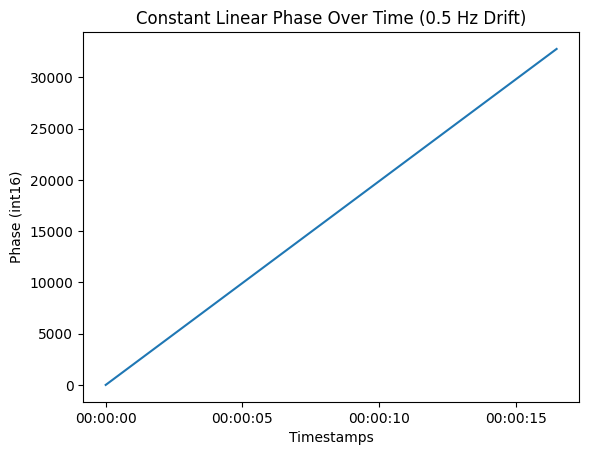

In [34]:
# create a range of regularly spaced times
n = 5000 # number of times
step = 3300 # time between each in us

sampling_rate = 300 #flow sensor sampling rate
frequency = 0.5 #desired drift frequency
# m = 2 * np.pi / (sampling_rate / frequency)   #slope change per step. 2*no.

print([i for i in np.arange(0, n*step, step)])

#add harp timestamps
times = [np.datetime64(api.aeon(0)) + np.timedelta64(i, 'us') for i in np.arange(0, n*step, step)]
print(times)

samples_per_cycle = sampling_rate / frequency  # 600 samples per cycle
phase_increment_per_sample = 2 * np.pi / samples_per_cycle  # Constant phase increment
print(f"Phase increment per sample: {phase_increment_per_sample}")

# Generate the phase values by linearly increasing the phase, using the constant phase increment
linear_phase_values = np.arange(n) * phase_increment_per_sample

# Ensure the values fit within the int16 range by scaling appropriately
# Scale radians to fit the int16 range (-32,768 to 32,767)
scaling_factor = 32767 / np.max(linear_phase_values)  # Scale max phase to 32767
# scaling_factor = 32767 / (2 * np.pi)  # A safe scaling factor based on the max phase (2π)
scaled_linear_values = linear_phase_values * scaling_factor

plt.plot(times, int16_linear_values)
plt.xlabel('Timestamps')
plt.ylabel('Phase (int16)')
plt.title('Constant Linear Phase Over Time (0.5 Hz Drift)')
plt.show()

# Convert to int16
int16_linear_values = np.int16(scaled_linear_values)
# plt.plot(sin_wave)

# construct into a data frame
dataframe = pd.DataFrame(int16_linear_values, index=times)
# dataframe = pd.DataFrame(sin_wave, index=times)

dataframe.to_csv('lin_playback.csv', header=False, sep=',', lineterminator='\n')
